# Lista 4

## 1: Escreva um algoritmo gen´etico simples (SGA) para minimiza¸c˜ao da fun¸c˜ao y(x) = x2 − 0.3 cos (10πx) no intervalo x ∈ [−2, +2], utilizando um gen´otipo de representa¸c˜ao bin´aria com pelo menos 16 bits. Utilizando inicializa¸c˜ao aleat´oria, execute cinco vezes o algoritmo. Comente sobre os resultados obtidos.

In [194]:
# Custo
using Random

function J(x)
    return x^2 - 0.3*cos(10*pi*x);
end

## SGA
# Populacao Inicial

mu = 10
nBits = 16
Xs = BitArray(undef, mu, nBits);
xlim = 2
gens = 1000
k = 3
pm = 0.5
Jmin = -3/10

function bin2num(x, lims)
    power = 1
    total = 0
    for bit in x
        if(bit)
            total += power
        end
        power = 2*power
    end
    max = (2^(length(x)) - 1)
    return lims*(2*total/max - 1)
end

bin2num (generic function with 2 methods)

In [195]:
# Avaliacao

function SGA(Xs, k)
    parents = BitArray(undef, k, nBits)
    Jhist = Array{Float64}(undef, gens)
    scores = Array{Float64}(undef, mu);
    for gen = 1:gens
        
        # Pontuacao  
        for i = 1:mu
            scores[i] = J(bin2num(Xs[i, :], xlim));
        end
        minIdx = argmin(scores)
        Jhist[gen] = scores[minIdx]
        if(abs(Jmin - scores[minIdx]) < 0.001)
            println("Minimo encontrado:");
            return scores[minIdx], bin2num(Xs[minIdx, :], xlim), Jhist
        end
        
        # Selecao dos Pais
        topIdx = sortperm(scores, rev=false)
        copy!(parents, Xs[topIdx[1:k], :])
        
        # Crossover
        for i = 1:mu
            p1 = parents[rand(1:k), :]
            p2 = parents[rand(1:k), :]
            
            for j = 1:nBits
                if rand() > 0.5
                    Xs[i, j] = p1[j]
                else
                    Xs[i, j] = p2[j]
                end
            end
        end
        
        # Mutacao
        for i = 1:mu
            if rand() < pm
                old = Xs[i, rand(1:nBits)]
                Xs[i, rand(1:nBits)] = !old
            end
        end
    end
    # Pontuacao
    minIdx = argmin(scores)
    println("Minimo nao encontrado:");
    return scores[minIdx], bin2num(Xs[minIdx, :], xlim), Jhist
end

SGA (generic function with 2 methods)

In [196]:

allJ = Array{Float64}(undef, gens, 5)

for j = 1:5
    for i = 1:mu
        Xs[i, :] = BitArray(rand() < 0.5 for x in 1:nBits)
    end

    minS, minX, Jhist = SGA(Xs, k);
    println("Min S: ", minS)
    println("Min X: ", minX)
    println("Min S Ideal: ", Jmin)
    println("Min X Ideal: ", 0)
    
    allJ[:, j] = Jhist
end

Minimo encontrado:
Min S: -0.2999265712279818
Min X: -0.0007019150072480329
Min S Ideal: -0.3
Min X Ideal: 0
Minimo nao encontrado:
Min S: -0.14096612718947146
Min X: 0.39645990691996635
Min S Ideal: -0.3
Min X Ideal: 0
Minimo encontrado:
Min S: -0.2999998611876711
Min X: 3.0518043793392735e-5
Min S Ideal: -0.3
Min X Ideal: 0
Minimo nao encontrado:
Min S: 0.05831751877676472
Min X: -0.5917753871976805
Min S Ideal: -0.3
Min X Ideal: 0
Minimo nao encontrado:
Min S: -0.26021575852773643
Min X: -0.19925230792706183
Min S Ideal: -0.3
Min X Ideal: 0


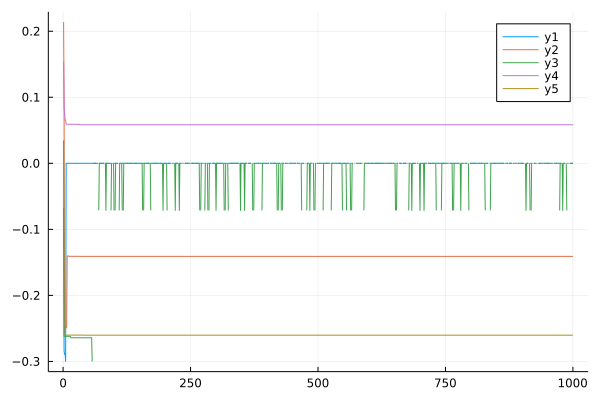

In [197]:
using Plots
plot(allJ)


Comentarios sobre os resultados

# 2. Escreva um algoritmo de estratégia de evolução (ES) para encontrar o ponto ótimo global da função de Ackley com 20 (ou mais) variáveis. Execute o algoritmo muitas vezes (150 execuções com inicialização independente, por exemplo) e guarde o melhor resultado de cada execução. No final, faça um histograma dos 150 valores armazenados.


In [1]:
function ackley(x)
    a = 20
    b = 0.2
    c = 2*pi
    d = length(x)
    return -a*exp(-b*sqrt(1/d*sum(x .^ 2))) - exp(1/d*sum(cos.(c .* x))) + a + exp(1)
end

ackley (generic function with 1 method)

In [6]:
using Plots

x = -20:0.01:20
y = -20:0.01:20
z = []

for i = 1:length(x)
    row = []
    for j = 1:length(y)
        append!(row, ackley([x[i]; y[j]]))
    end
    append!(z, row)
end

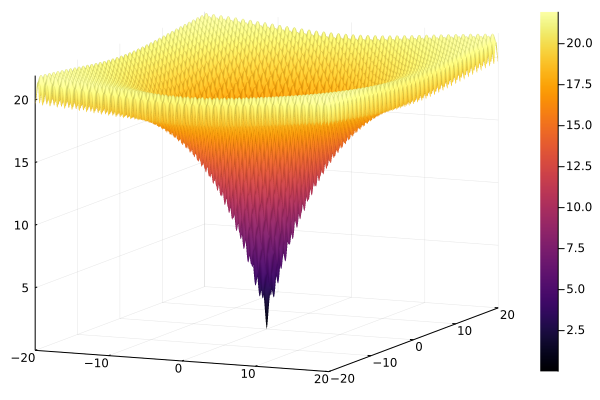

┌ Warning: camera: -30° ∉ [0°, 90°]
└ @ Plots C:\Users\victo\.julia\packages\Plots\rDbWY\src\backends\gr.jl:1438


In [8]:
plot(x,y,z,st=:surface)

In [126]:
#ES

function ES(x, gens)
    Jhist = Array{Float64}(undef, gens)
    scores = Array{Float64}(undef, mu);
    scores2 = Array{Float64}(undef, mu+lambda);
#     scores2 = Array{Float64}(undef, lambda);
    parents = Array{Float64}(undef, mu, dims+nSigma)
    descendants = Array{Float64}(undef, lambda, dims+nSigma)
    for gen = 1:gens
        
        # Pontuacao  
        for i = 1:mu
            scores[i] = ackley(x[i, 1:dims]);
        end
        minIdx = argmin(scores)
        Jhist[gen] = scores[minIdx]
        if(abs(Jmin - scores[minIdx]) < 0.001)
            println("Minimo encontrado:");
            return scores[minIdx], x[minIdx, :], Jhist
        end
        
        # Selecao dos Pais
        copy!(parents, x)
        
        # Crossover
        for i = 1:lambda
            p1 = parents[rand(1:mu), :]
            p2 = parents[rand(1:mu), :]
            
            for j = 1:dims
                if rand() > 0.5
                    descendants[i, j] = p1[j]
                else
                    descendants[i, j] = p2[j]
                end
            end
            for j = 1+dims:dims+nSigma
                descendants[i, j] = (p1[j] + p2[j])/2
            end
        end
            
        # Mutacao
        for i = 1:lambda
            for j = 1+dims:dims+nSigma
                descendants[i, j] = descendants[i, j]*exp(tau1)*exp(tau2)
                if(abs(descendants[i, j]) < eps0)
                    descendants[i, j] = eps0*sign(descendants[i, j])
                end
#                 if(abs(descendants[i, j]) > 20)
#                     descendants[i, j] = (20 - eps0)*sign(descendants[i, j])
#                 end
            end
            for j = 1:dims
                descendants[i, j] = descendants[i, j] + descendants[i, j+dims]
                if(descendants[i, j] > 20)
                    descendants[i, j] = -20
                end
                if(descendants[i, j] < -20)
                    descendants[i, j] = 20
                end
            end
            
        end
        
        # Sobreviventes (Apenas Filhos)
#         for i = 1:lambda
#             scores2[i] = ackley(descendants[i, 1:dims]);
#         end
#         topIdx = sortperm(scores2, rev=false)
#         copy!(x, descendants[topIdx[1:mu], :])
#         println(x[1, mu+1])
#         println(scores2)
#         println(scores2[topIdx[1:mu]])
        
        # Sobreviventes (Pais e Filhos)
        scores2[1:mu] = scores[:]
        for i = mu+1:lambda+mu
            scores2[i] = ackley(descendants[i-mu, 1:dims]);
        end
        candidates = [parents; descendants];
        topIdx = sortperm(scores2, rev=false)
        copy!(x, candidates[topIdx[1:mu], :])
        
    end
    # Pontuacao
    minIdx = argmin(scores)
#     println("Minimo nao encontrado:");
    return scores[minIdx], x[:, minIdx], Jhist
end

ES (generic function with 1 method)

In [158]:
# Primeira Geracao
using Random
using ProgressMeter

runs = 30
gens = 500
dims = 20
mu = 30
lambda = 200
eps0 = 0.1
nSigma = dims
Jmin = 0
tauC = 0.01
tau1 = tauC/sqrt(2*dims)
tau2 = tauC/sqrt(2*sqrt(dims))
Jmin = 0



allJ = Array{Float64}(undef, gens, runs)
minSList = Array{Float64}(undef, runs)

@showprogress for j = 1:runs
    Random.seed!(j);
    x = rand(mu, dims+nSigma).*40 .- 20
    time = @elapsed begin
        minS, minX, Jhist = ES(x, gens);
#         println("Min S: ", minS)
    #     println("Min X: ", minX)
    #     println("Min S Ideal: ", Jmin)
    #     println("Min X Ideal: ", 0)
        allJ[:, j] = Jhist
        minSList[j] = minS
    end
#     println("Tempo: ", time)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


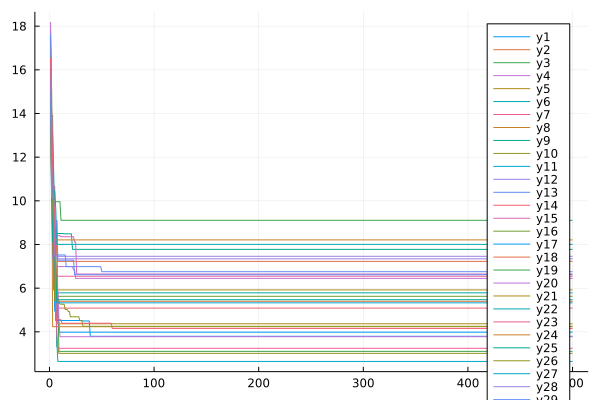

In [159]:
using Plots
plot(allJ)

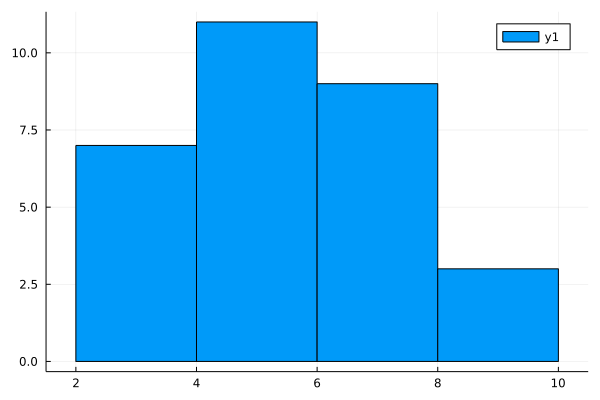

In [160]:
histogram(minSList)


In [75]:
minSList

5-element Vector{Float64}:
 17.815076547719823
 17.815076547719823
 17.815076547719823
 17.815076547719823
 17.815076547719823